<a href="https://colab.research.google.com/github/junghyeon0114/ESAA_YB_practice/blob/main/%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8(2)_3%EC%A1%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **[ 미니 프로젝트 (2) ]**
### **8기 3조 - 서혜현, 곽지수, 임정현, 서유진, 이인서**

- 과제 : 데이콘의 **'와인 품질 분류 예측 경진대회'** 데이터셋을 전처리 및 시각화하고, 분류 알고리즘을 적용

- 조건 : 분류 모델 3가지 이상 적용

-  분석 파일을 1) 제출 후 리더보드에서 점수 확인 2) github에 업로드하여 점수와 깃허브 링크를 과제함에 댓글로 달아주시면 됩니다. 점수 고득점팀 1위 조원분들께는 우수학회원 점수 가산이 있을 예정

- 제출기한: 2022.05.22 (월) 23:59

- 관련 사이트: https://dacon.io/competitions/open/235610/overview/description

**<변수 소개>**
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

#01. 필요한 모듈 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 시각화
import seaborn as sns # 시각화
from sklearn.model_selection import GridSearchCV #하이퍼 파라미터 튜닝을 그리드 서치로 진행하기 위함
from sklearn.preprocessing import LabelEncoder	#label encoding을 사용하기 위함.
from sklearn.ensemble import RandomForestClassifier # RandomForest 분류 모델 사용
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

#02. 데이터 불러오기

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/test.csv")

# 03. 데이터 분석

* 데이터 확인

In [ ]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


=> test데이터의 quality를 예측해야하기 때문에, test 데이터에는 quality가 없다.

In [ ]:
train.shape

(5497, 14)

In [ ]:
test.shape

(1000, 13)

* 결측치, type 확인

  분석할 때 결측치가 존재하면 분석이 어렵기 때문에 결측치가 있는지 확인해 준다.

In [ ]:
# 결측치 확인
train.isna().sum()

index                   0
quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

=> 결측치 없음

In [ ]:
# 데이터 타입

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


=>  type을 제외하고 모두 수치형 데이터임을 확인 할 수 있다.

=> 대부분 모델에서는 수치형 데이터만을 입력으로 받을 수 있기 때문에 이후 type의 값들을 수치형으로 변환

* opject형 컬럼 값 확인

  opject형 컬럼의 값이 무엇이 있는지 파악하기 위해, type 컬럼의 값들을 list에 저장하고 중복을 제거하기 위해 집합으로 바꾸어서 확인한다.

In [ ]:
#object형 컬럼 값의 종류가 무엇이 있는지 파악
set(train['type'].values.tolist())

{'red', 'white'}

* 변수간의 상관관계, 분포 확인

<Axes: >

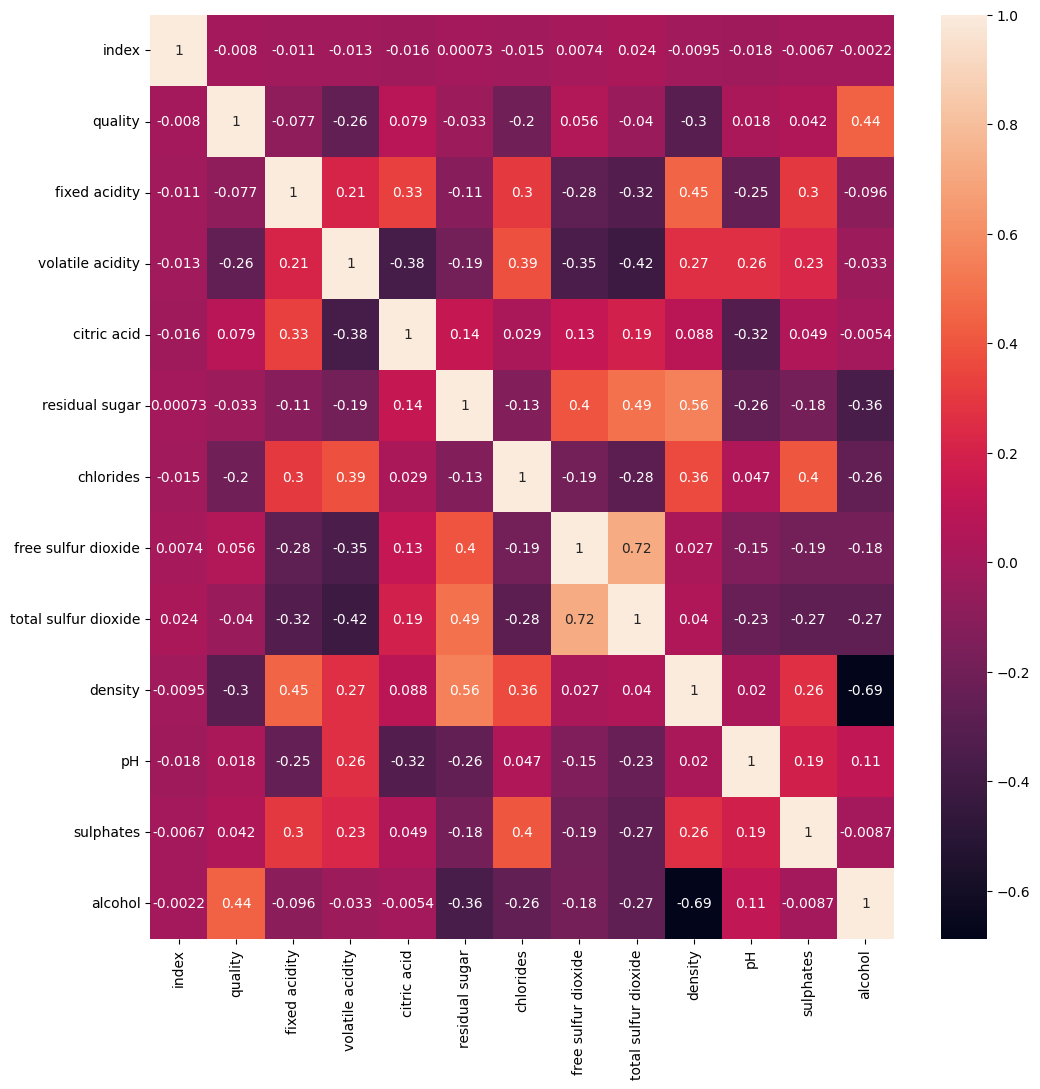

In [ ]:
# train의 변수 간 상관관계 확인
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)

=> quality 변수(예측하려고 하는 target)와 상관관계가 있는 변수가 거의 없다. 따라서 선형회귀 모델은 와인 품질을 예측하는데 적합하지 않다.

In [ ]:
# 변수들의 분포

train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


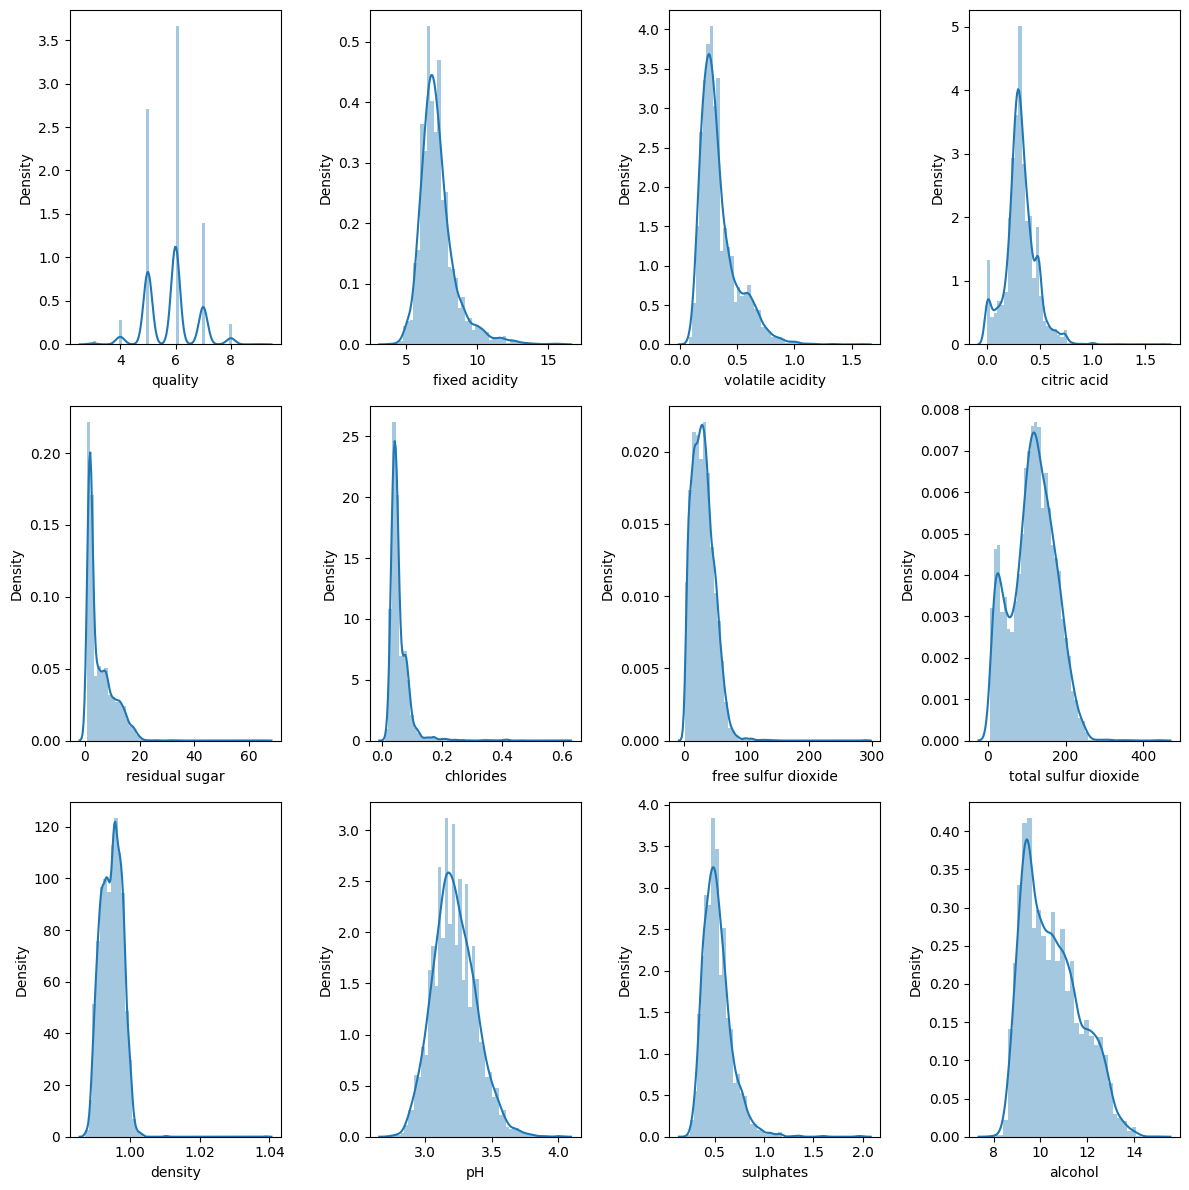

In [ ]:
# train의 각 변수별 분포를 살펴봅니다.
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

=> 왼쪽으로 치우친 변수들은 로그 변한 수행

#03 데이터 전처리

* 불필요한 칼럼 삭제

  id컬럼은 target변수에 어떠한 영향을 미치는 것이 아닌, 고유한 값이기 때문에 해당 컬럼을 삭제

In [ ]:
# id값은 필요 없으므로 제거한다.
train=train.drop(['index'],axis=1)
test=test.drop(['index'],axis=1)

* 변수 스케일링

 변수들의 scale이 다르기 때문에 표준화를 통해 scale을 맞추어 줌

 같은 과정을 test데이터에도 동일하게 적용

In [ ]:
train.columns

Index(['quality', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'type'],
      dtype='object')

In [ ]:
'''
# 각 컬럼별로 sclae이 다르므로, 표준화 시켜준다. 이 때, type은 수치형이 아니므로 잠깐 제외하고 표준화를 진행한다.
standardtrain=train.drop(['type','quality'],axis=1)
standardtrain=(standardtrain-standardtrain.mean())/standardtrain.std()
standardtrain=pd.merge(standardtrain,train['type'],left_index=True,right_index=True)
'''

"\n# 각 컬럼별로 sclae이 다르므로, 표준화 시켜준다. 이 때, type은 수치형이 아니므로 잠깐 제외하고 표준화를 진행한다.\nstandardtrain=train.drop(['type','quality'],axis=1)\nstandardtrain=(standardtrain-standardtrain.mean())/standardtrain.std()\nstandardtrain=pd.merge(standardtrain,train['type'],left_index=True,right_index=True)\n"

In [ ]:
'''
# test 데이터도 표준화 진행
standardtest=test.drop(['type'],axis=1)
standardtest=(standardtest-standardtest.mean())/standardtest.std()
test=pd.merge(standardtest,test['type'],left_index=True,right_index=True)
'''

"\n# test 데이터도 표준화 진행\nstandardtest=test.drop(['type'],axis=1)\nstandardtest=(standardtest-standardtest.mean())/standardtest.std()\ntest=pd.merge(standardtest,test['type'],left_index=True,right_index=True)\n"

In [ ]:
col_log=['fixed acidity', 'volatile acidity', 'citric acid',
         'residual sugar', 'chlorides', 'free sulfur dioxide',
         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
train[col_log] = np.log1p(train[col_log])

In [ ]:
test[col_log] = np.log1p(test[col_log])

* type 변수 라벨 인코딩

 type 변수의 값을 label encoding을 이용하여 수치형으로 변환한다.

 이 또한 train, test데이터 셋에 모두 적용해준다.

In [ ]:
enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

* train data 분리

  학습 데이터(train)를 feature(x)와 target(y)으로 나눈다. 와인 품질을 예측해야하므로 target은 quality(와인 품질)컬럼이 되고, 나머지 컬럼은 feature이 된다.

In [ ]:
train_x= train.drop(['quality'],axis=1)
train_y=train['quality']
test_x = test

In [ ]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,1.887070,0.527683,0.058269,2.054124,0.041142,2.302585,4.442651,0.690303,1.490654,0.364643,2.415914,1
1,2.282382,0.476234,0.131028,1.223775,0.064851,2.397895,3.761200,0.691596,1.432701,0.463734,2.351375,0
2,2.186051,0.190620,0.329304,1.098612,0.055435,3.091042,4.934474,0.689019,1.398717,0.418710,2.476538,1
3,2.079442,0.190620,0.270027,1.945910,0.044973,3.401197,4.691348,0.690093,1.449269,0.405465,2.468100,1
4,2.174752,0.336472,0.231112,2.351375,0.057325,3.496508,5.187386,0.690895,1.396245,0.357674,2.476538,1


In [ ]:
train_y.head()

0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

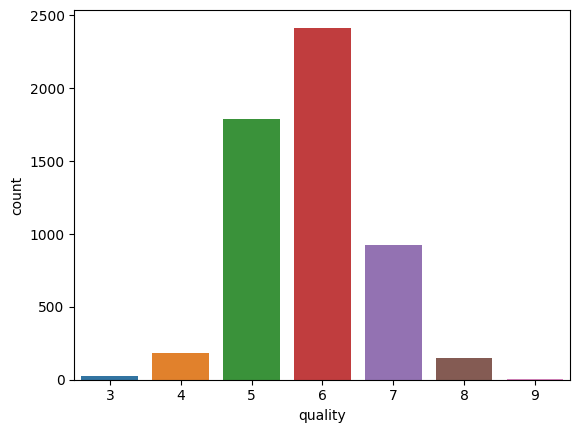

In [ ]:
# train_y의 분포
sns.countplot(x=train_y)

=> 와인 품질 6등급이 가장 많음

<Axes: xlabel='type', ylabel='count'>

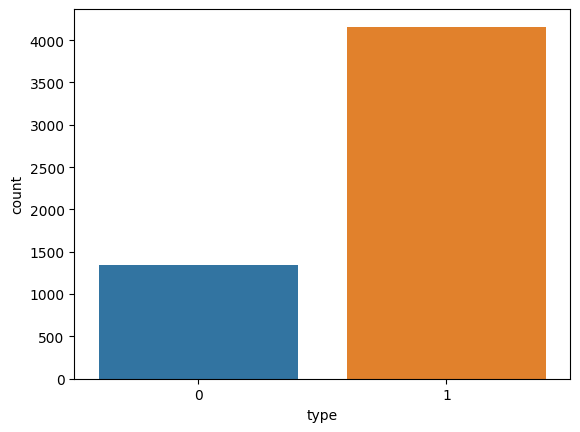

In [ ]:
# train_x 데이터에서 type의 분포
sns.countplot(data=train_x, x=train_x['type'])

=> '0'은 'red', '1'은 'white' 와인을 의미  

# 04. 모델 학습

사용한 모델 알고리즘은 LightGBM, GradientBoosting, 랜덤포레스트, XGBoost이다.

### 1) LightGBM 모델

(1) 첫번째 시도

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm_clf = LGBMClassifier()

params = {'n_estimators': [200,300,500],
          'num_leaves':[16,32,64],
          'max_depth':[32,64,128],
          'min_child_samples' : [30,50,70]}

evals = [(train_x, train_y)]
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(train_x, train_y, early_stopping_rounds=30, eval_metric="logloss", eval_set=evals, verbose=True)

print('GridSearchCV 최적 파라미터:',gridcv.best_params_)

=> 'max_depth': 64, 'min_child_samples': 30, 'n_estimators': 200, 'num_leaves': 64일 때, 최적의 파라미터

* 위의 최적 파라미터를 LightGBM

  n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, learning_rate=0.02, reg_alpha=0.03,
                           max_depth= 64, min_child_samples= 30, num_leaves= 64)

evals = [(train_x, train_y)]
lgbm_clf.fit(train_x, train_y, early_stopping_rounds=200,
              eval_metric="logloss", eval_set=evals, verbose=True)

In [ ]:
predict=lgbm_clf.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=predict
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission8.csv',index=False)

=> 리더보드 : 0.692

(2) 두번째 시도

In [ ]:
lgbm_clf = LGBMClassifier( max_depth= 32, min_child_samples= 30, n_estimators= 200, num_leaves= 64)

evals = [(train_x, train_y)]
lgbm_clf.fit(train_x, train_y, early_stopping_rounds=200,
              eval_metric="logloss", eval_set=evals, verbose=True)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=predict
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission5.csv',index=False)

=> 리더보드 : 0.689

* 세번째 시도

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgbm_clf3 = LGBMClassifier()

params = {'n_estimators': [200,500],
          'num_leaves':[32,64],
          'max_depth':[8,16,32],
          'min_child_samples' : [60,80,100]}

evals = [(train_x, train_y)]
gridcv3 = GridSearchCV(lgbm_clf3, param_grid=params, cv=3)
gridcv3.fit(train_x, train_y, early_stopping_rounds=30, eval_metric="logloss", eval_set=evals, verbose=True)

print('GridSearchCV 최적 파라미터:',gridcv3.best_params_)

In [ ]:
lgbm_clf3 = LGBMClassifier(max_depth= 16, min_child_samples= 100, n_estimators= 500, num_leaves= 32)

evals = [(train_x, train_y)]
lgbm_clf3.fit(train_x, train_y, early_stopping_rounds=200,
              eval_metric="logloss", eval_set=evals, verbose=True)

predict=lgbm_clf3.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=predict
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission6.csv',index=False)

=> 리더보드 : 0.680

2) Gradient Boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import GridSearchCV

gbm_clf1 = GradientBoostingClassifier()

params = {
    'n_estimators':[100,300,500],
    'learning_rate':[0.05,0.1, 0.2],
    'max_depth':[8,16,32],
    'min_samples_leaf':[5,8,10]
}

gridcv4 = GridSearchCV(gbm_clf1, param_grid=params, cv=3, verbose=1)
gridcv4.fit(train_x, train_y)
print('최적 하이퍼 파라미터:\n', gridcv4.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500}


=> 'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 500가 최적 파라미터

In [ ]:
gbm_clf1 = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators= 500)
gbm_clf1.fit(train_x, train_y)
gb_pred1 = gbm_clf1.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=gb_pred1
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission9.csv',index=False)

=> 리더보드 : 0.695

* 두번째 시도

예측 정확도를 높이기 위해 위의 최적 파라미터를 기본으로 두고, 'min_samples'에 대한 grid search 진행

In [ ]:
from sklearn.model_selection import GridSearchCV

gbm_clf2 = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators= 500)

params = {
    'min_samples_leaf':[5,8,10]
}

gridcv5 = GridSearchCV(gbm_clf2, param_grid=params, cv=3, verbose=1)
gridcv5.fit(train_x, train_y)
print('최적 하이퍼 파라미터:\n', gridcv5.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
최적 하이퍼 파라미터:
 {'min_samples_leaf': 5}


In [ ]:
gb_pred2 = gridcv5.best_estimator_.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=gb_pred2
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission10.csv',index=False)

=> 리더보드 : 0.7

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf3 = GradientBoostingClassifier(learning_rate=0.05, max_depth=8, n_estimators= 600, min_samples_leaf=5)
gbm_clf3.fit(train_x, train_y)
gb_pred3 = gbm_clf3.predict(test_x)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=gb_pred3
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission11.csv',index=False)

* 세번째 시도

learning_rate, max_depth, n_estimators, min_samples_leaf를 한번에 gridSearch 해보기

In [ ]:
from sklearn.model_selection import GridSearchCV

gbm_clf3 = GradientBoostingClassifier()

params = {
    'n_estimators':[300,500],
    'learning_rate':[0.05,0.07, 0.1],
    'max_depth':[8,16],
    'min_samples_leaf':[5,8]
}

gridcv6 = GridSearchCV(gbm_clf3, param_grid=params, cv=3, verbose=1)
gridcv6.fit(train_x, train_y)
print('최적 하이퍼 파라미터:\n', gridcv6.best_params_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
최적 하이퍼 파라미터:
 {'learning_rate': 0.07, 'max_depth': 16, 'min_samples_leaf': 5, 'n_estimators': 300}


In [ ]:
gb_pred3 = gridcv6.best_estimator_.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=gb_pred3
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission12.csv',index=False)

=> 리더보드 : 0.699

### 3) RandomForest

* 첫번째 시도

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings('default')

In [ ]:
RF = GradientBoostingClassifier(n_estimators=300)

params = {
    'max_features' : [3, 4, 5],
    'max_depth':[8,16]
}

gridcv7 = GridSearchCV(RF, param_grid=params, cv=3, verbose=1)
gridcv7.fit(train_x, train_y)
print('최적 하이퍼 파라미터:\n', gridcv7.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
최적 하이퍼 파라미터:
 {'max_depth': 16, 'max_features': 4}


In [ ]:
gb_pred4 = gridcv7.best_estimator_.predict(test_x)

In [ ]:
sample_submission=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/sample_submission.csv")
sample_submission['quality']=gb_pred4
sample_submission.head()
sample_submission.to_csv('/content/drive/MyDrive/Colab Notebooks/esaa/project/미니프로젝트2/submission14.csv',index=False)

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


=> 0.688

### 4) XGboost

In [ ]:
# 라이브러리 및 데이터 불러오기
import pandas as pd
from xgboost import XGBClassifier

train = pd.read_csv("/content/drive/MyDrive/23-1 ESAA YB/data/와인품질분류/train.csv")
test = pd.read_csv("/content/drive/MyDrive/23-1 ESAA YB/data/와인품질분류/test.csv")

train.drop('index',axis = 1 ,inplace =True)
test.drop('index',axis = 1 ,inplace =True)

# 원핫 인코딩 (pd.get_dummies())
train_one = pd.get_dummies(train)
test_one = pd.get_dummies(test)

In [ ]:
# 모델 정의
xgb = XGBClassifier()

In [ ]:
# 모델 학습

# X 는 train에서 quality 를 제외한 모든 변수
# y 는 train의 qulity 변수

X = train_one.drop('quality', axis= 1)
y = train_one['quality']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# fit 메소드를 이용해 모델 학습
xgb.fit(X,y)

In [ ]:
# predict 메소드와 test_one 데이터를 이용해 품질 예측
pred = xgb.predict(test_one)

In [ ]:
# sample_submission.csv 파일을 불러와 예측된 값으로 채워 주기
submission = pd.read_csv("/content/drive/MyDrive/23-1 ESAA YB/data/와인품질분류/sample_submission.csv")
submission['quality'] = pred
submission.head()

In [ ]:
# 정답파일 내보내기
submission.to_csv('xgb_pred.csv',index = False)